## PCA 수학적 이해

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 준비

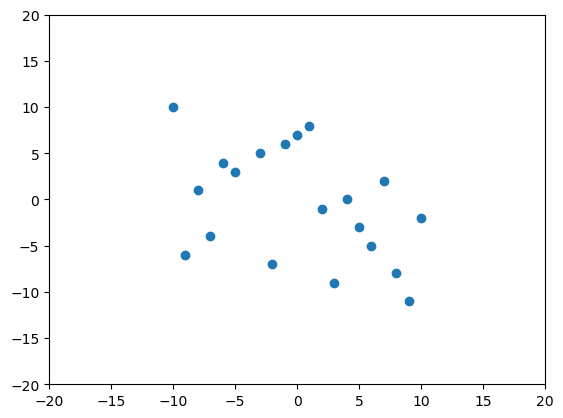

In [2]:
np.random.seed(42)

x = np.random.choice(np.arange(-10, 11), size=20, replace=False)
y = np.random.choice(np.arange(-11, 11), size=20, replace=False)

plt.scatter(x, y)
plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.show()

In [5]:
print(np.mean(x), np.var(x, ddof=1), np.std(x, ddof=1))
print(np.mean(y), np.var(y, ddof=1), np.std(y, ddof=1))

0.2 39.642105263157895 6.296197682979617
-0.5 37.10526315789474 6.091408963277276


### 공분산 행렬 Covariance Matrix

In [6]:
np.cov(x, y)

array([[ 39.64210526, -16.05263158],
       [-16.05263158,  37.10526316]])

### 고유값과 고유 벡터

In [3]:
eig_val, eig_vec = np.linalg.eig(np.cov(x, y))
evec1, evec2 = eig_vec[:, 0], eig_vec[:, 1]
eval1, eval2 = eig_val[0], eig_val[1]

print(eval1, evec1)
print()
print(eval2, evec2)

54.47635083988237 [ 0.73442865 -0.67868591]

22.27101758117025 [0.67868591 0.73442865]


In [4]:
from sklearn.decomposition import PCA

In [9]:
def PCA_df(df, scaling=True, ncomponents_=2):
    
    # if scaling:
    #     scaler = StandardScaler()
    #     df = scaler.fit_transform(df)

    pca = PCA(n_components=ncomponents_)
    pca.fit(df)
    pca_df = pca.transform(df)

    print(f"스케일 데이터 shape: {pca_df.shape}")
    print(f"PCA 데이터 shape: {pca_df.shape}")
    
    pca_columns = ['pca_1','pca_2']

    pca_df = pd.DataFrame(pca_df, columns=pca_columns)
    pca_df['exp_power'] = pca_df['pca_1'] + pca_df['pca_2']
    # pca_df.index = index_
    pca_df.sort_values(by=['exp_power', 'pca_1',], ascending=False, inplace=True)

    return pca, pca_df

In [66]:
def biplot(score, coeff, exp_ratio, pcax, pcay, labels=None, highlight_idx=None):
    pca1, pca2 = pcax - 1, pcay - 1
    xs, ys = score.iloc[:, pca1], score.iloc[:, pca2]
    n = score.shape[1]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    exp1 = np.round(exp_ratio[pca1] * 100, 2)
    exp2 = np.round(exp_ratio[pca2] * 100, 2)

    plt.scatter(xs * scalex, ys * scaley)
    if highlight_idx is not None:
        for idx in highlight_idx[:3]:
            plt.scatter(xs.iloc[idx] * scalex, ys.iloc[idx] * scaley, color='red')
            plt.text(xs.iloc[idx] * scalex, ys.iloc[idx] * scaley, f"{idx}", color='red')
        for idx in highlight_idx[3:]:
            plt.scatter(xs.iloc[idx] * scalex, ys.iloc[idx] * scaley, color='green')
            plt.text(xs.iloc[idx] * scalex, ys.iloc[idx] * scaley, f"{idx}", color='green')

    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-0.8, 0.8)
    plt.ylim(-0.8, 0.8)
    plt.xlabel("PC{} ({}%)".format(pcax, exp1))
    plt.ylabel("PC{} ({}%)".format(pcay, exp2))
    plt.grid()

In [5]:
XY_df = pd.DataFrame({'X':x, 'Y':y})
XY_df

,X,Y
0,-10,10
1,7,2
2,5,-3
3,-9,-6
4,-2,-7
5,-5,3
6,1,8
7,-7,-4
8,8,-8
9,6,-5


### PCA 분석과 시각화 (스케일링 X)

In [13]:
pca, pca_df = PCA_df(df=pd.DataFrame({'X':x, 'Y':y}))

스케일 데이터 shape: (20, 2)
PCA 데이터 shape: (20, 2)


In [18]:
highlight_idx = [0, 3, 11, 8, 19, 13]

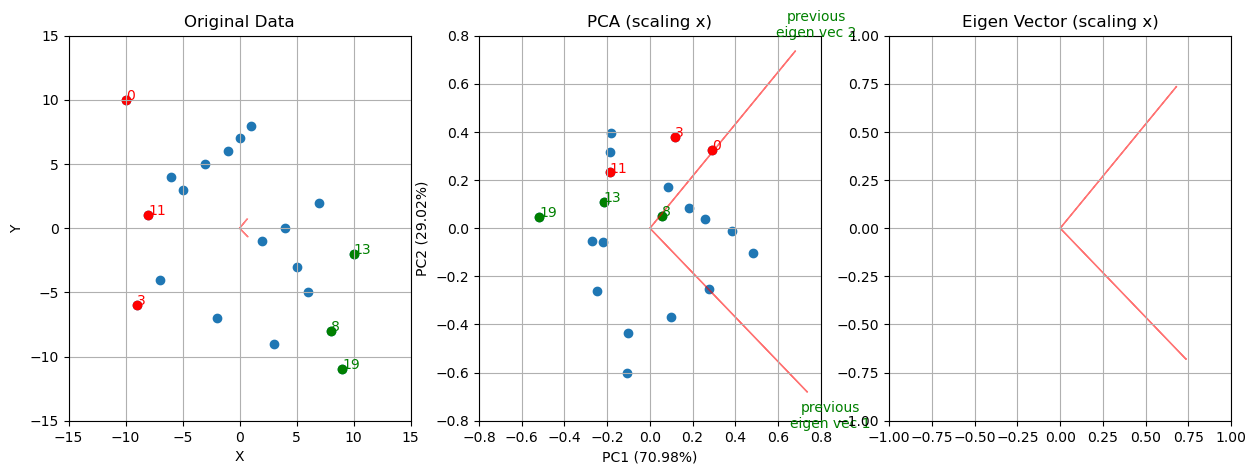

In [72]:
plt.figure(figsize=(15,5))

# plot 1
plt.subplot(1,3,1)
plt.scatter(x, y)
for idx in highlight_idx[:3]:
    plt.scatter(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], color='red')
    plt.text(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], f"{idx}", color='red')
for idx in highlight_idx[3:]:
    plt.scatter(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], color='green')
    plt.text(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], f"{idx}", color='green')
plt.arrow(0, 0, evec1[0], evec1[1], color='r', alpha=0.5)
plt.arrow(0, 0, evec2[0], evec2[1], color='r', alpha=0.5)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

# plot 2
plt.subplot(1,3,2)
biplot(pca_df.drop('exp_power', axis=1),
       coeff=pca.components_,
       exp_ratio=pca.explained_variance_ratio_,
       pcax=1, pcay=2,
       labels=['previous\neigen vec 1', 'previous\neigen vec 2'], highlight_idx=highlight_idx)
plt.title('PCA (scaling x)')

# plot3
plt.subplot(1,3,3)
plt.arrow(0, 0, evec1[0], evec1[1], color='r', alpha=0.5)
plt.arrow(0, 0, evec2[0], evec2[1], color='r', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.title('Eigen Vector (scaling x)')

plt.show()

### 해석

* 공분산 행렬은 X와 Y의 선형 관계와 분산 정도를 요약한 행렬로, 데이터의 분포 방향을 알 수 있다.
* 이 행렬의 선형변환(고유값 분해)를 통해 분산이 최대가 되는 방향으로 데이터를 새로 투영
* 고유벡터는 새로운 축 PC1과 PC2의 방향

### 다른 시각화 1

[ 0.2 -0.5] [ 16.46203406 -15.52775452]


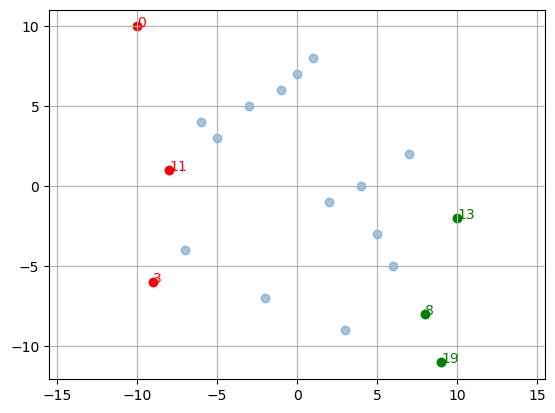

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2, color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(XY_df.loc[:, 'X'], XY_df.loc[:, 'Y'], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

for idx in highlight_idx[:3]:
    plt.scatter(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], color='red')
    plt.text(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], f"{idx}", color='red')
for idx in highlight_idx[3:]:
    plt.scatter(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], color='green')
    plt.text(XY_df.loc[idx, 'X'], XY_df.loc[idx, 'Y'], f"{idx}", color='green')

plt.axis('equal')
plt.grid()
plt.show()

### 다른 시각화 2

In [42]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()
XY_df_scaled = scaler.fit_transform(XY_df)

cov_matrix = np.cov(XY_df_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

principal_components1 = XY_df_scaled.dot(eigenvectors[:, 0])
principal_components2 = XY_df_scaled.dot(eigenvectors[:, 1])

pc1_vector = eigenvectors[:, 0]
pc2_vector = eigenvectors[:, 1]

In [107]:
print(principal_components1)
print(principal_components2)
print(pc1_vector)
print(pc2_vector)

[-0.07524187 -1.08127229 -0.25533195  1.7151059   1.02763264  0.18232348
 -1.10451487  1.24646036 -0.00551412 -0.13235992  0.68970666  0.76619353
 -0.63586933 -0.95055273  0.17844972 -0.14785497 -0.28632206 -0.8701921
 -0.49740225  0.23655617]
[-2.42582173  0.48578095  0.85082328 -0.40502496  0.52064483 -1.01601135
 -0.92015567 -0.41277249  1.79198813  1.20424432  1.33496388 -1.12348833
 -0.91240814  1.30784753 -1.25033412  0.26695324 -1.02375888 -0.9162819
  0.37830398  2.26450743]
[-0.70710678 -0.70710678]
[ 0.70710678 -0.70710678]


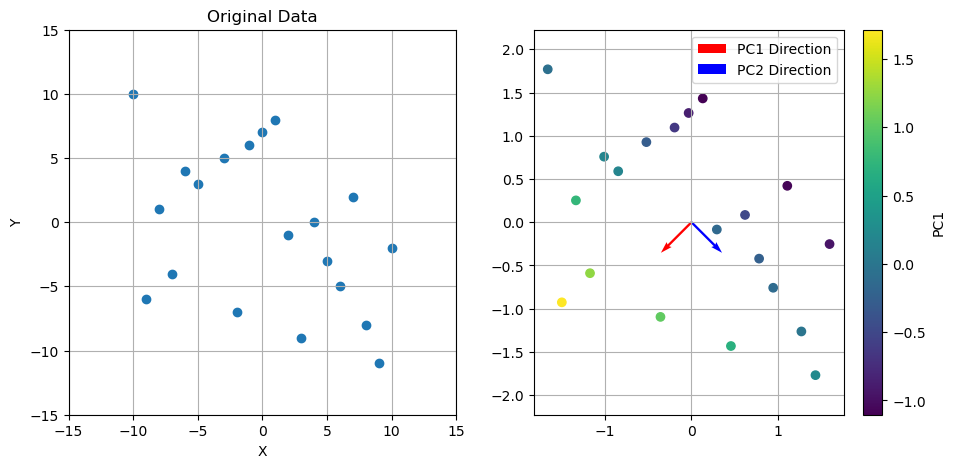

In [120]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(XY_df_scaled[:, 0], XY_df_scaled[:, 1], c=principal_components1, cmap='viridis')
plt.colorbar(label='PC1')
plt.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy',  scale=2, color='red', label='PC1 Direction')
plt.quiver(0, 0, pc2_vector[0], pc2_vector[1], angles='xy', scale_units='xy',  scale=2, color='blue', label='PC2 Direction')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

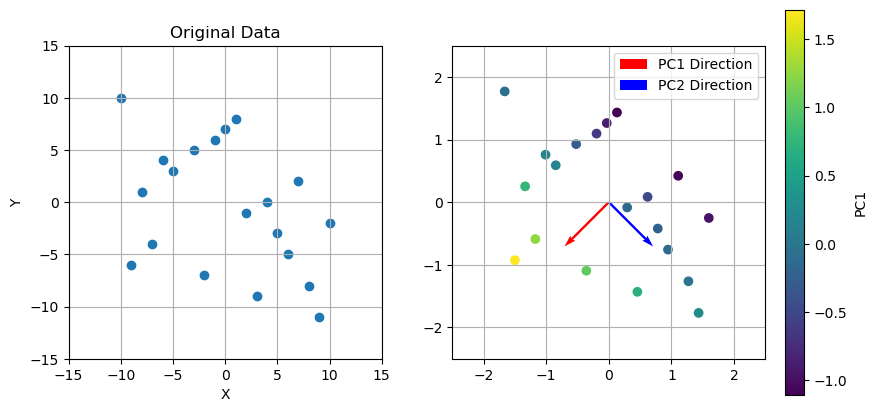

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 5]})

ax1 = axes[0]
ax1.scatter(XY_df['X'], XY_df['Y'])
ax1.set_xlim(-15, 15)
ax1.set_ylim(-15, 15)
ax1.set_title("Original Data")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

ax2 = axes[1]
scatter_plot = ax2.scatter(XY_df_scaled[:, 0], XY_df_scaled[:, 1], c=principal_components1, cmap='viridis')
fig.colorbar(scatter_plot, ax=ax2, label='PC1')
ax2.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='PC1 Direction')
ax2.quiver(0, 0, pc2_vector[0], pc2_vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='PC2 Direction')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.legend()
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)

plt.show()

### 다른 시각화 3 Scatter Plot

In [84]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(XY_df)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pd.concat([XY_df, pca_df], axis=1)

,X,Y,PC1,PC2
0,-10,10,-14.617374,0.788904
1,7,2,3.297400,6.451136
2,5,-3,5.221972,1.421621
3,-9,-6,-3.023971,-10.283268
4,-2,-7,2.795715,-6.266895
5,-5,3,-6.194430,-0.958666
6,1,8,-5.181287,6.785592
7,-7,-4,-2.912486,-7.457039
8,8,-8,10.818688,-0.214465
9,6,-5,7.313773,0.631449


In [83]:
# highlight_idx = [0, 11, 14, 5, 16, 12, 17, 6]
highlight_idx = [1, 2, 8, 9, 13, 15, 18]

In [85]:
origin = pca.mean_
vectors = pca.components_
scale = 5

In [86]:
vectors

array([[ 0.73442865, -0.67868591],
       [ 0.67868591,  0.73442865]])

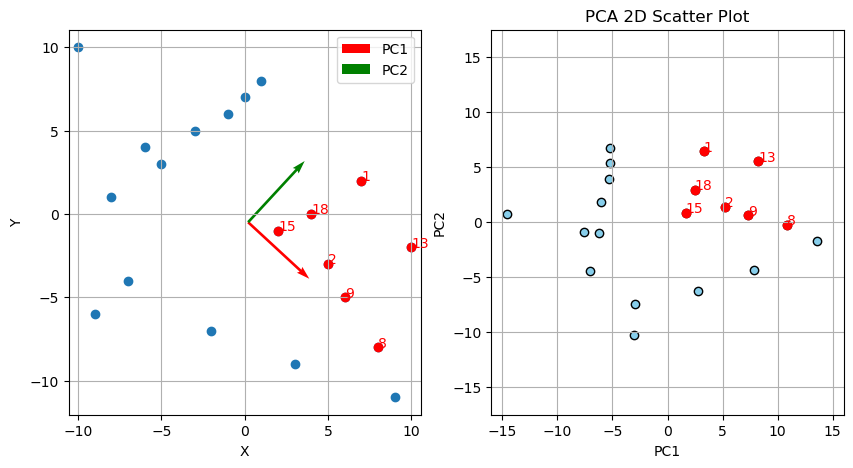

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(XY_df['X'], XY_df['Y'])
for i in highlight_idx:
    plt.scatter(XY_df.loc[i, 'X'], XY_df.loc[i, 'Y'], color='red')
    plt.text(XY_df.loc[i, 'X'], XY_df.loc[i, 'Y'], f"{i}", color='red')

for i in range(2):
    plt.quiver(*origin, 
               *(vectors[i] * scale), 
               angles='xy', scale_units='xy', scale=1, 
               color='r' if i == 0 else 'g', label=f'PC{i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='skyblue', edgecolor='black')
for i in highlight_idx:
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], color='red')
    plt.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], f"{i}", color='red')

plt.title('PCA 2D Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()

### 다른 시각화 4 biplot

In [103]:
scaler = StandardScaler()
XY_df_scaled = scaler.fit_transform(XY_df)

In [104]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(XY_df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [105]:
vectors = pca.components_ # 고유벡터
explained = pca.explained_variance_ratio_

In [106]:
XY_df_scaled[1]

array([1.10807398, 0.42107596])

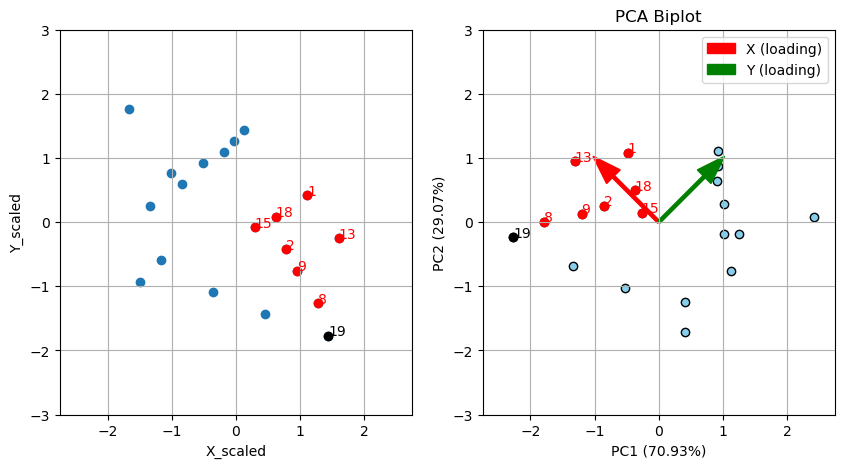

In [119]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(XY_df_scaled[:, 0], XY_df_scaled[:, 1])
for i in highlight_idx:
    plt.scatter(XY_df_scaled[i][0], XY_df_scaled[i][1], color='red')
    plt.text(XY_df_scaled[i][0], XY_df_scaled[i][1], f"{i}", color='red')

plt.scatter(XY_df_scaled[19][0], XY_df_scaled[19][1], color='black')
plt.text(XY_df_scaled[19][0], XY_df_scaled[19][1], "19", color='black')
plt.xlabel('X_scaled')
plt.ylabel('Y_scaled')
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='skyblue', edgecolor='k')
plt.title('PCA Biplot')
plt.xlabel(f'PC1 ({explained[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained[1]*100:.2f}%)')

# 고유벡터를 원래 공간에서 PCA 공간으로 투영하여 표시
scale = 1  # 화살표 길이 조절용
for i, (comp, name) in enumerate(zip(vectors, ['X', 'Y'])):
    plt.arrow(0, 0, comp[0]*scale, comp[1]*scale, 
              color='red' if i==0 else 'green', width=0.05, head_width=0.3, label=f'{name} (loading)')
    # plt.text(comp[0]*scale*1.1, comp[1]*scale*1.1, name, color='g', ha='center', va='center')
for i in highlight_idx:
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], color='red')
    plt.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], f"{i}", color='red')

plt.scatter(pca_df.loc[19, 'PC1'], pca_df.loc[19, 'PC2'], color='black')
plt.text(pca_df.loc[19, 'PC1'], pca_df.loc[19, 'PC2'], "19", color='black')

plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.grid()
plt.show()

In [108]:
xys_pca_df = pd.concat([pd.DataFrame(XY_df_scaled, columns=['X', 'Y']), pca_df], axis=1)
xys_pca_df.loc[(xys_pca_df['PC1'] < 0) & (xys_pca_df['PC2'] > 0)] # X(제 2사분면)

,X,Y,PC1,PC2
1,1.108074,0.421076,-0.485781,1.081272
2,0.782170,-0.421076,-0.850823,0.255332
8,1.271026,-1.263228,-1.791988,0.005514
9,0.945122,-0.757937,-1.204244,0.132360
13,1.596930,-0.252646,-1.307848,0.950553
15,0.293314,-0.084215,-0.266953,0.147855
18,0.619218,0.084215,-0.378304,0.497402


In [116]:
xys_pca_df.iloc[[19], :]

,X,Y,PC1,PC2
19,1.433978,-1.768519,-2.264507,-0.236556


* 그래프 해석

X 는 제 2사분면 방향으로, PC1 방향에는 음(-)의 기여, PC2 방향에는 양(+)의 기여  
-> **X가 클수록 PC1은 작아지고, PC2는 커진다.**

Y 는 제 1사분면 방향으로, **Y가 클수록 PC1과 PC2 모두 커진다.**

### 스케일링 비교

In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(pd.DataFrame([x, y]).T)
xs, ys = scaled[:, 0], scaled[:, 1]
print(xs)
print(ys)

[-1.66211096  1.10807398  0.78216986 -1.49915891 -0.35849452 -0.84735069
  0.13036164 -1.1732548   1.27102603  0.94512192  0.45626575 -1.33620685
 -0.19554247  1.59693014 -1.01030274  0.2933137  -0.52144658 -0.03259041
  0.61921781  1.43397809]
[ 1.76851903  0.42107596 -0.42107596 -0.92636711 -1.0947975   0.58950634
  1.43165827 -0.58950634 -1.26322788 -0.75793673 -1.43165827  0.25264558
  1.0947975  -0.25264558  0.75793673 -0.08421519  0.92636711  1.26322788
  0.08421519 -1.76851903]


In [8]:
eig_val2, eig_vec2 = np.linalg.eig(np.cov([xs, ys]))
evec3, evec4 = eig_vec2[:, 0], eig_vec2[:, 1]
eval3, eval4 = eig_val2[0], eig_val2[1]

print(evec3, eval3)
print(evec4, eval4)

[-0.70710678 -0.70710678] 0.6120498124436515
[ 0.70710678 -0.70710678] 1.4932133454510854


In [ ]:
xy_scaled_df = pd.DataFrame({'X_scaled':xs, 'Y_scaled':ys})
pca2, pca_df2 = PCA_df(df=xy_scaled_df, scaling=False)

스케일 데이터 shape: (20, 2)
PCA 데이터 shape: (20, 2)


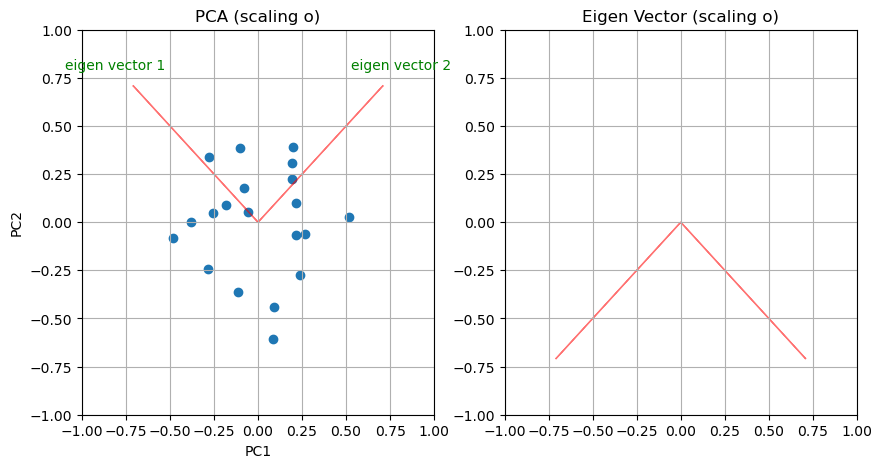

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
biplot(pca_df2.drop('exp_power', axis=1), pca2.components_, 1, 2, labels=['eigen vector 1', 'eigen vector 2'])
plt.title('PCA (scaling o)')

plt.subplot(1,2,2)
plt.arrow(0, 0, evec3[0], evec3[1], color='r', alpha=0.5)
plt.arrow(0, 0, evec4[0], evec4[1], color='r', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.title('Eigen Vector (scaling o)')

plt.show()

In [11]:
pca2.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [13]:
print(evec3)
print(evec4)

[-0.70710678 -0.70710678]
[ 0.70710678 -0.70710678]


In [12]:
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.70927634, 0.29072366]), np.float64(0.9999999999999999))

* 0번 인덱스 설명

    - evec3 : [-0.70710678 -0.70710678]
    - evec4 : [ 0.70710678 -0.70710678]

    x_scaled, y_scaled : 기존 0번 인덱스의 x, y 값이 표준화된 데이터  
    pca_1, 2 : 기존 x, y 값이 고유벡터에 의해 선형변환된 데이터
    - pca_1 : (-1.6621 * -0.7071) + (1.7685 * 0.7071) ≈ 1.1756 + 1.2502 ≈ 2.43
    - pca_2 : (-1.6621 * 0.7071) + (1.7685 * 0.7071) ≈ -1.1756 + 1.2502 ≈ 0.075

    - pca_1 ≈ 2.43: 첫 번째 주성분 방향으로 강하게 분포
    - pca_2 ≈ 0.075: 두 번째 주성분 방향으로 거의 영향 없음

In [16]:
pd.concat([xy_scaled_df, pca_df2], axis=1)

,x_scaled,y_scaled,pca_1,pca_2,exp_power
0,-1.662111,1.768519,2.425822,0.075242,2.501064
1,1.108074,0.421076,-0.485781,1.081272,0.595491
2,0.782170,-0.421076,-0.850823,0.255332,-0.595491
3,-1.499159,-0.926367,0.405025,-1.715106,-1.310081
4,-0.358495,-1.094797,-0.520645,-1.027633,-1.548277
5,-0.847351,0.589506,1.016011,-0.182323,0.833688
6,0.130362,1.431658,0.920156,1.104515,2.024671
7,-1.173255,-0.589506,0.412772,-1.246460,-0.833688
8,1.271026,-1.263228,-1.791988,0.005514,-1.786474
9,0.945122,-0.757937,-1.204244,0.132360,-1.071884
